In [3]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import linalg
import sympy as sm

def Func(x):
  #return np.arctan(x)
  return x/(1+x**2)

def Lagrange(x,y,X):
  L=0
  #print(len(x))
  for i in range(len(x)):
    #print(i)
    numerat=1
    denumerat=1
    for j in range(len(x)):
       if i!=j:
         numerat=numerat*(X-x[j])
         denumerat=denumerat*(x[i]-x[j])
    L=L+(numerat/denumerat)*y[i]
    #print(L)
  return L


Демонстрация переобучения для двух подходов к аппроксимации - по МНК и по интерполяции. Есть обучающая выборка (X для МНК и x для интерполяции).

1
2
3


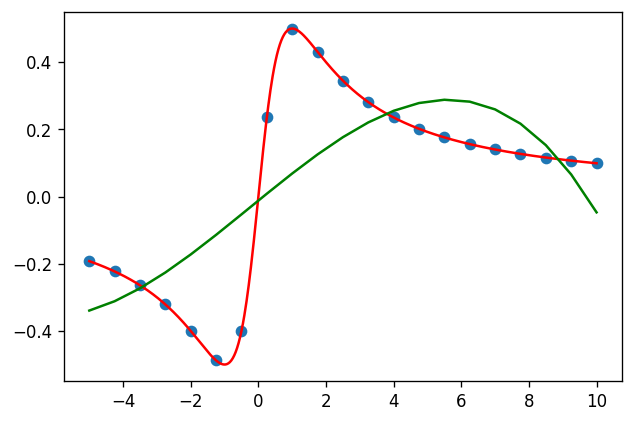

In [ ]:
N=20
#X = np.linspace(-1,1,N+1)
X = np.linspace(-5,10,N+1)
#X[1]=-0.05
#X[2]=0.25
Y=np.mat(np.zeros((N+1),'float'))
Y=Func(X)
m=4
#Y=X*np.cos(X+3)
#Y=np.exp(X)*np.cos(X+3)
#Y=(X**2)*np.sin(X)




n=700;
#x=np.linspace(-1,1,n+1)
x=np.linspace(-5,10,n+1)
#y=x*np.cos(x+3)
#y=np.exp(x)*np.cos(x+3)
#y=(x**2)*np.sin(x)
y=Func(x)

figure(figsize=(6, 4), dpi=120)
plt.plot(x,y,color='red')
plt.scatter(X,Y)

Q=np.mat(np.zeros((N+1,m),'float'))

for i in range(N+1):
  for j in range(m):
    Q[i,j]=X[i]**(j)


A=np.dot(np.transpose(Q),Q)
#plt.matshow(A)
b=np.dot(np.transpose(Q),np.transpose(Y))
B=linalg.inv(A)
c=np.dot(B,np.transpose(b))
#for i in range(N):
#  print(c[i])


yy1=c[0,0];
yy2=c[0,0];
for i in range(1,m):
  print(i)
  yy1=yy1+c[i,0]*x**i
  yy2=yy2+c[i,0]*X**i


#yy1=c[0,0]+c[1,0]*x+c[2,0]*x**2+c[3,0]*x**3

plt.plot(X,yy2,color='green')

#plt.plot(x,yy1,color='black')

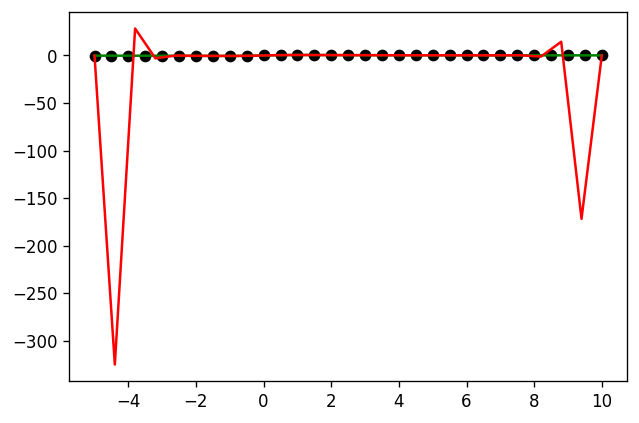

In [ ]:
N=25 #for test
n=30 #learning for interpolation

a=-5
b=10
xx=np.linspace(a,b,N+1) #test
yy=np.zeros(N+1)
for i in range(N+1):
  yy[i]=Func(xx[i])

figure(figsize=(6, 4), dpi=120)
plt.plot(xx,yy,color='green')


x=np.linspace(a,b,n+1)
y=Func(x)
plt.scatter(x,y,color='black')


y1=Lagrange(x,y,xx)
plt.plot(xx,y1,color='red')

7
0.0
0.2857142857142857
0.5714285714285714
0.8571428571428571
1.1428571428571428
1.4285714285714284
1.7142857142857142
2.0
2.2857142857142856
2.571428571428571
2.8571428571428568
3.142857142857143
3.4285714285714284
3.714285714285714
4.0
4.0
x1= 0.0
x2= 0.2857142857142857
x1= 0.5714285714285714
x2= 0.8571428571428571
x1= 1.1428571428571428
x2= 1.4285714285714284
x1= 1.7142857142857142
x2= 4.0
x1= 2.2857142857142856
x2= 2.571428571428571
x1= 2.8571428571428568
x2= 3.142857142857143
x1= 3.4285714285714284
x2= 3.714285714285714


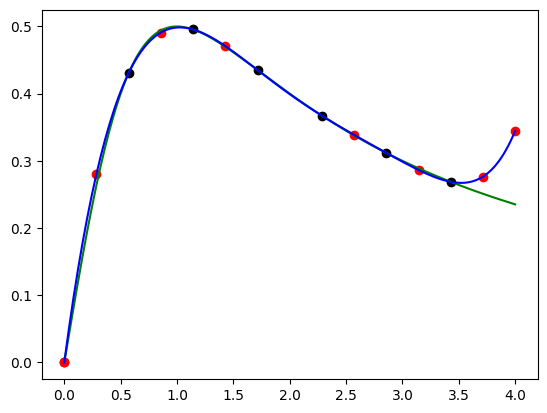

In [22]:
N=15
a=0
b=4
X=np.linspace(a,b,N)
nn=int((N-1)/2)
print(nn)
x1=np.zeros(nn)
x2=np.zeros(nn+1)

n=200;
xx=np.linspace(a,b,n)
yy=Func(xx)


for i in range(N):
  print(X[i])

  for i in range(nn):
    x1[i]=X[2*i]
    x2[i]=X[2*i+1]

x2[3]=X[N-1]
print(x2[3])

for i in range(nn):
  print('x1=',x1[i])
  print('x2=',x2[i])



y1=Func(x1)
plt.scatter(x1,y1,color='black')
y2=Lagrange(x1,y1,x2)
Y=Lagrange(x1,y1,xx)
plt.scatter(x2,y2,color='red')
plt.plot(xx,yy,color='green')
plt.plot(xx,Y,color='blue')